In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('byua702_722').getOrCreate()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pyspark.sql.functions as F

In [2]:
df = spark.read.load("./combined_new.csv", format = "csv", 
                     header = "true", inferSchema=True)

In [4]:
df.show(5)

+--------------------+--------+--------------------+---------+--------+----+--------+-------+----+----+---+---+----+----+-----+
|            datetime|      id|                name|longitude|latitude|live|  cityid|stateid|PM25|PM10|NO2|NH3| SO2|  CO|OZONE|
+--------------------+--------+--------------------+---------+--------+----+--------+-------+----+----+---+---+----+----+-----+
|Thursday, 03 Jan ...|site_253|Punjab Agricultur...|  75.8086| 30.9028|true|Ludhiana| Punjab|  90| 166| 14| 10|null|null|    4|
|Thursday, 03 Jan ...|site_253|Punjab Agricultur...|  75.8086| 30.9028|true|Ludhiana| Punjab|  61| 146| 14| 10|null|null|    4|
|Thursday, 03 Jan ...|site_253|Punjab Agricultur...|  75.8086| 30.9028|true|Ludhiana| Punjab|  56| 151| 14| 10|null|null|    5|
|Thursday, 03 Jan ...|site_253|Punjab Agricultur...|  75.8086| 30.9028|true|Ludhiana| Punjab| 186| 157| 14| 10|null|null|    5|
|Thursday, 03 Jan ...|site_253|Punjab Agricultur...|  75.8086| 30.9028|true|Ludhiana| Punjab| 238| 164| 

In [5]:
df.count()

110615

In [6]:
df.columns


['datetime',
 'id',
 'name',
 'longitude',
 'latitude',
 'live',
 'cityid',
 'stateid',
 'PM25',
 'PM10',
 'NO2',
 'NH3',
 'SO2',
 'CO',
 'OZONE']

In [7]:
df.describe("PM25").show()
df.describe("PM10").show()
df.describe("NO2").show()
df.describe("NH3").show()
df.describe("SO2").show()
df.describe("CO").show()
df.describe("OZONE").show()


+-------+------------------+
|summary|              PM25|
+-------+------------------+
|  count|             96719|
|   mean|141.82488445910317|
| stddev|119.53937468813452|
|    min|                 0|
|    max|               500|
+-------+------------------+

+-------+------------------+
|summary|              PM10|
+-------+------------------+
|  count|             80416|
|   mean|132.43413002387584|
| stddev| 94.79845601148669|
|    min|                 0|
|    max|               500|
+-------+------------------+

+-------+-----------------+
|summary|              NO2|
+-------+-----------------+
|  count|            98933|
|   mean|44.25475827074889|
| stddev|40.50563261731471|
|    min|                0|
|    max|              431|
+-------+-----------------+

+-------+-----------------+
|summary|              NH3|
+-------+-----------------+
|  count|            82004|
|   mean|7.809082483781279|
| stddev|6.362582644048434|
|    min|                0|
|    max|              125|

In [8]:
df.printSchema()

root
 |-- datetime: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- live: boolean (nullable = true)
 |-- cityid: string (nullable = true)
 |-- stateid: string (nullable = true)
 |-- PM25: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- NO2: integer (nullable = true)
 |-- NH3: integer (nullable = true)
 |-- SO2: integer (nullable = true)
 |-- CO: integer (nullable = true)
 |-- OZONE: integer (nullable = true)



In [9]:
df.count()

110615

In [10]:
df.toPandas()

,datetime,id,name,longitude,latitude,live,cityid,stateid,PM25,PM10,NO2,NH3,SO2,CO,OZONE
0,"Thursday, 03 Jan 2019, 12:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,90.0,166.0,14.0,10.0,NaN,NaN,4.0
1,"Thursday, 03 Jan 2019, 01:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,61.0,146.0,14.0,10.0,NaN,NaN,4.0
2,"Thursday, 03 Jan 2019, 02:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,56.0,151.0,14.0,10.0,NaN,NaN,5.0
3,"Thursday, 03 Jan 2019, 03:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,186.0,157.0,14.0,10.0,NaN,NaN,5.0
4,"Thursday, 03 Jan 2019, 04:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,238.0,164.0,14.0,11.0,NaN,NaN,5.0
5,"Thursday, 03 Jan 2019, 05:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,226.0,161.0,14.0,11.0,NaN,NaN,4.0
6,"Thursday, 03 Jan 2019, 06:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,191.0,161.0,14.0,10.0,NaN,NaN,4.0
7,"Thursday, 03 Jan 2019, 07:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,107.0,144.0,14.0,10.0,NaN,NaN,5.0
8,"Thursday, 03 Jan 2019, 08:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,73.0,111.0,14.0,10.0,NaN,NaN,5.0
9,"Thursday, 03 Jan 2019, 09:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.808600,30.902800,True,Ludhiana,Punjab,57.0,92.0,14.0,10.0,NaN,NaN,5.0


In [3]:
from pyspark.sql.types import (StringType, DoubleType, BooleanType)

for i in df.columns:
    mvCount=df.where(F.col(i).isNull()).count()
    print("Missing values in " + i + " = %g" % mvCount)

df2 = df.select(df.datetime, df.id, df.name, df.cityid, df.stateid, df.live.cast("boolean"),
                df.longitude.cast("double"), df.latitude.cast("double"), 
                df.PM25.cast("double"), df.PM10.cast("double"), df.NO2.cast("double"),
                df.NH3.cast("double"), df.SO2.cast("double"), df.CO.cast("double"),
                df.OZONE.cast("double"))

df2.printSchema()

df2.toPandas()

df_new=df2.na.fill(0,subset=['longitude', 'latitude', 'PM25', 'PM10', 
                              'NO2', 'NH3', 'SO2','CO', 'OZONE'])

df_new.show(10)
for j in df_new.columns:
    mvCount=df_new.where(F.col(j).isNull()).count()
    print("Missing values in " + j + " = %g" % mvCount)

Missing values in datetime = 0
Missing values in id = 0
Missing values in name = 0
Missing values in longitude = 0
Missing values in latitude = 0
Missing values in live = 0
Missing values in cityid = 0
Missing values in stateid = 0
Missing values in PM25 = 13896
Missing values in PM10 = 30199
Missing values in NO2 = 11682
Missing values in NH3 = 28611
Missing values in SO2 = 16661
Missing values in CO = 23793
Missing values in OZONE = 17252
root
 |-- datetime: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- cityid: string (nullable = true)
 |-- stateid: string (nullable = true)
 |-- live: boolean (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NH3: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- OZONE: double (nullable = tru

In [12]:
df_new.toPandas()

,datetime,id,name,cityid,stateid,live,longitude,latitude,PM25,PM10,NO2,NH3,SO2,CO,OZONE
0,"Thursday, 03 Jan 2019, 12:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,90.0,166.0,14.0,10.0,0.0,0.0,4.0
1,"Thursday, 03 Jan 2019, 01:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,61.0,146.0,14.0,10.0,0.0,0.0,4.0
2,"Thursday, 03 Jan 2019, 02:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,56.0,151.0,14.0,10.0,0.0,0.0,5.0
3,"Thursday, 03 Jan 2019, 03:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,186.0,157.0,14.0,10.0,0.0,0.0,5.0
4,"Thursday, 03 Jan 2019, 04:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,238.0,164.0,14.0,11.0,0.0,0.0,5.0
5,"Thursday, 03 Jan 2019, 05:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,226.0,161.0,14.0,11.0,0.0,0.0,4.0
6,"Thursday, 03 Jan 2019, 06:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,191.0,161.0,14.0,10.0,0.0,0.0,4.0
7,"Thursday, 03 Jan 2019, 07:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,107.0,144.0,14.0,10.0,0.0,0.0,5.0
8,"Thursday, 03 Jan 2019, 08:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,73.0,111.0,14.0,10.0,0.0,0.0,5.0
9,"Thursday, 03 Jan 2019, 09:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",Ludhiana,Punjab,True,75.808600,30.902800,57.0,92.0,14.0,10.0,0.0,0.0,5.0


In [13]:
df_new1 = df_new.select("cityid", "stateid", "live")
df_new1.toPandas()

,cityid,stateid,live
0,Ludhiana,Punjab,True
1,Ludhiana,Punjab,True
2,Ludhiana,Punjab,True
3,Ludhiana,Punjab,True
4,Ludhiana,Punjab,True
5,Ludhiana,Punjab,True
6,Ludhiana,Punjab,True
7,Ludhiana,Punjab,True
8,Ludhiana,Punjab,True
9,Ludhiana,Punjab,True


In [14]:
df_new2 = df_new.select("longitude", "latitude", "live", "PM25")
df_new2.toPandas()

,longitude,latitude,live,PM25
0,75.808600,30.902800,True,90.0
1,75.808600,30.902800,True,61.0
2,75.808600,30.902800,True,56.0
3,75.808600,30.902800,True,186.0
4,75.808600,30.902800,True,238.0
5,75.808600,30.902800,True,226.0
6,75.808600,30.902800,True,191.0
7,75.808600,30.902800,True,107.0
8,75.808600,30.902800,True,73.0
9,75.808600,30.902800,True,57.0


In [15]:
df_new3 = df_new.select("PM25", "PM10", "NO2", "NH3", "SO2", "CO", "OZONE")
df_new3.toPandas()

,PM25,PM10,NO2,NH3,SO2,CO,OZONE
0,90.0,166.0,14.0,10.0,0.0,0.0,4.0
1,61.0,146.0,14.0,10.0,0.0,0.0,4.0
2,56.0,151.0,14.0,10.0,0.0,0.0,5.0
3,186.0,157.0,14.0,10.0,0.0,0.0,5.0
4,238.0,164.0,14.0,11.0,0.0,0.0,5.0
5,226.0,161.0,14.0,11.0,0.0,0.0,4.0
6,191.0,161.0,14.0,10.0,0.0,0.0,4.0
7,107.0,144.0,14.0,10.0,0.0,0.0,5.0
8,73.0,111.0,14.0,10.0,0.0,0.0,5.0
9,57.0,92.0,14.0,10.0,0.0,0.0,5.0


In [16]:
df_new4 = df_new.select("longitude", "latitude", "PM25", "PM10", "NO2", "NH3", "SO2", "CO", "OZONE")
df_new4.toPandas()

,longitude,latitude,PM25,PM10,NO2,NH3,SO2,CO,OZONE
0,75.808600,30.902800,90.0,166.0,14.0,10.0,0.0,0.0,4.0
1,75.808600,30.902800,61.0,146.0,14.0,10.0,0.0,0.0,4.0
2,75.808600,30.902800,56.0,151.0,14.0,10.0,0.0,0.0,5.0
3,75.808600,30.902800,186.0,157.0,14.0,10.0,0.0,0.0,5.0
4,75.808600,30.902800,238.0,164.0,14.0,11.0,0.0,0.0,5.0
5,75.808600,30.902800,226.0,161.0,14.0,11.0,0.0,0.0,4.0
6,75.808600,30.902800,191.0,161.0,14.0,10.0,0.0,0.0,4.0
7,75.808600,30.902800,107.0,144.0,14.0,10.0,0.0,0.0,5.0
8,75.808600,30.902800,73.0,111.0,14.0,10.0,0.0,0.0,5.0
9,75.808600,30.902800,57.0,92.0,14.0,10.0,0.0,0.0,5.0


In [4]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

fcols = df_new.select(['datetime', 'id', 'name', 'cityid', 'stateid', 'live',
                         'latitude', 'live', 'cityid', 'stateid', 'PM25', 
                         'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'])
air_pollution = fcols


datetime_indexer = StringIndexer(inputCol='datetime',outputCol='datetimeIndex').fit(air_pollution)
air_pollution= datetime_indexer.transform(air_pollution)
air_pollution = OneHotEncoder(inputCol='datetimeIndex',outputCol='datetimeVec').transform(air_pollution)

id_indexer = StringIndexer(inputCol='id',outputCol='idIndex').fit(air_pollution)
air_pollution= id_indexer.transform(air_pollution)
air_pollution = OneHotEncoder(inputCol='idIndex',outputCol='idVec').transform(air_pollution)

name_indexer = StringIndexer(inputCol='name',outputCol='nameIndex').fit(air_pollution)
air_pollution= name_indexer.transform(air_pollution)
air_pollution = OneHotEncoder(inputCol='nameIndex',outputCol='nameVec').transform(air_pollution)

cityid_indexer = StringIndexer(inputCol='cityid',outputCol='cityidIndex').fit(air_pollution)
air_pollution= cityid_indexer.transform(air_pollution)
air_pollution = OneHotEncoder(inputCol='cityidIndex',outputCol='cityidVec').transform(air_pollution)

stateid_indexer = StringIndexer(inputCol='stateid',outputCol='stateidIndex').fit(air_pollution)
air_pollution= stateid_indexer.transform(air_pollution)
air_pollution = OneHotEncoder(inputCol='stateidIndex',outputCol='stateidVec').transform(air_pollution)


In [5]:
air_pollution= air_pollution.withColumn('logPM10', F.log('PM10'))
air_pollution= air_pollution.withColumn('logNO2', F.log('NO2'))
air_pollution.show()

air_pollution.describe('logPM10')



+--------------------+--------+--------------------+--------+-------+----+--------+----+--------+-------+-----+-----+----+----+---+---+-----+-------------+-------------------+-------+--------------+---------+--------------+-----------+--------------+------------+-------------+------------------+------------------+
|            datetime|      id|                name|  cityid|stateid|live|latitude|live|  cityid|stateid| PM25| PM10| NO2| NH3|SO2| CO|OZONE|datetimeIndex|        datetimeVec|idIndex|         idVec|nameIndex|       nameVec|cityidIndex|     cityidVec|stateidIndex|   stateidVec|           logPM10|            logNO2|
+--------------------+--------+--------------------+--------+-------+----+--------+----+--------+-------+-----+-----+----+----+---+---+-----+-------------+-------------------+-------+--------------+---------+--------------+-----------+--------------+------------+-------------+------------------+------------------+
|Thursday, 03 Jan ...|site_253|Punjab Agricultur...|

DataFrame[summary: string, logPM10: string]

In [19]:
from pyspark.sql.functions import corr

colNames =  ['longitude', 'latitude', 'PM25','PM10','NO2', 
             'NH3', 'SO2', 'CO', 'OZONE']

a=[]
for coln1 in colNames:
    for coln2 in colNames:
        b = df.select(corr(coln1,coln2)).toPandas()
        a.append(b.iloc[0])
print(a)
             
       



[corr(longitude, longitude)    1.0
Name: 0, dtype: float64, corr(longitude, latitude)   -0.546857
Name: 0, dtype: float64, corr(longitude, PM25)    0.051189
Name: 0, dtype: float64, corr(longitude, PM10)    0.040311
Name: 0, dtype: float64, corr(longitude, NO2)   -0.046696
Name: 0, dtype: float64, corr(longitude, NH3)   -0.277473
Name: 0, dtype: float64, corr(longitude, SO2)    0.172787
Name: 0, dtype: float64, corr(longitude, CO)   -0.007103
Name: 0, dtype: float64, corr(longitude, OZONE)   -0.101971
Name: 0, dtype: float64, corr(latitude, longitude)   -0.546857
Name: 0, dtype: float64, corr(latitude, latitude)    1.0
Name: 0, dtype: float64, corr(latitude, PM25)    0.124289
Name: 0, dtype: float64, corr(latitude, PM10)    0.114444
Name: 0, dtype: float64, corr(latitude, NO2)   -0.019629
Name: 0, dtype: float64, corr(latitude, NH3)    0.348855
Name: 0, dtype: float64, corr(latitude, SO2)   -0.004701
Name: 0, dtype: float64, corr(latitude, CO)    0.110849
Name: 0, dtype: float64, corr(

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f241771f908>]],
      dtype=object)

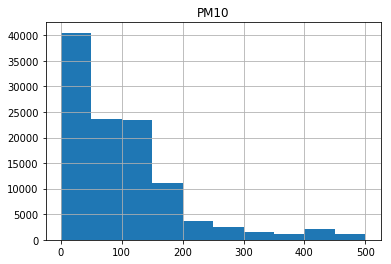

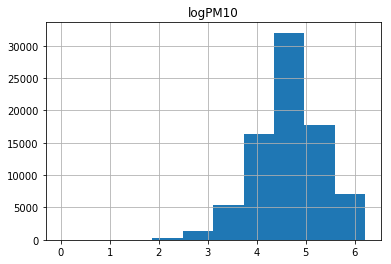

In [20]:
air_pollution.select("PM10").toPandas().hist()
air_pollution.select("logPM10").toPandas().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f241723d0f0>]],
      dtype=object)

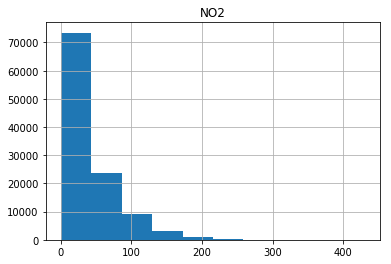

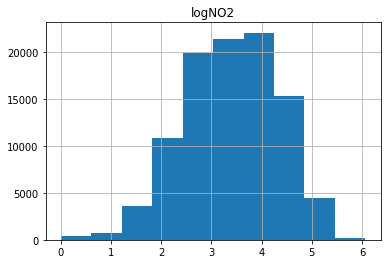

In [21]:
air_pollution.select("NO2").toPandas().hist()
air_pollution.select("logNO2").toPandas().hist()

In [22]:
air_pollution.drop('logPM10','logNO2')

DataFrame[datetime: string, id: string, name: string, cityid: string, stateid: string, live: boolean, latitude: double, live: boolean, cityid: string, stateid: string, PM25: double, PM10: double, NO2: double, NH3: double, SO2: double, CO: double, OZONE: double, datetimeIndex: double, datetimeVec: vector, idIndex: double, idVec: vector, nameIndex: double, nameVec: vector, cityidIndex: double, cityidVec: vector, stateidIndex: double, stateidVec: vector]

In [6]:
assembler = VectorAssembler(
    inputCols=['PM25','PM10','NO2', 'NH3', 'OZONE'],
    outputCol="patterns")

(train_data, test_data) = df_new.randomSplit([0.7, 0.3], seed = 123)


lr_train_data = assembler.transform(train_data)
lr_test_data = assembler.transform(test_data)


In [7]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='patterns', labelCol='PM25', predictionCol='prediction')
lrModel = lr.fit(lr_train_data)

print("Coefficients: {} ".format(lrModel.coefficients))
print("Intercept: {}".format(lrModel.intercept))

Coefficients: [0.9999999999999997,2.276780392023067e-16,-6.039163596308862e-16,1.8577889601155827e-15,-9.488930010658551e-17] 
Intercept: 5.1892741773349324e-14


In [8]:
lr_train_results = lrModel.evaluate(lr_train_data)

print("Mean Absolute Error on train data: {}".format(lr_train_results.meanAbsoluteError))
print("Mean Squared Error on train data: {}".format(lr_train_results.meanSquaredError))
print("Root Mean Squared Error on train data: {}".format(lr_train_results.rootMeanSquaredError))

Mean Absolute Error on train data: 4.3151795944222337e-14
Mean Squared Error on train data: 2.7028127095151946e-27
Root Mean Squared Error on train data: 5.198858249188176e-14


In [9]:
lr_test_results = lrModel.evaluate(lr_test_data)


print("Mean Absolute Error on test data: {}".format(lr_test_results.meanAbsoluteError))
print("Mean Squared Error on test data: {}".format(lr_test_results.meanSquaredError))
print("Root Mean Squared Error on test data: {}".format(lr_test_results.rootMeanSquaredError))

Mean Absolute Error on test data: 4.30455874876582e-14
Mean Squared Error on test data: 2.706647697109968e-27
Root Mean Squared Error on test data: 5.2025452396975544e-14


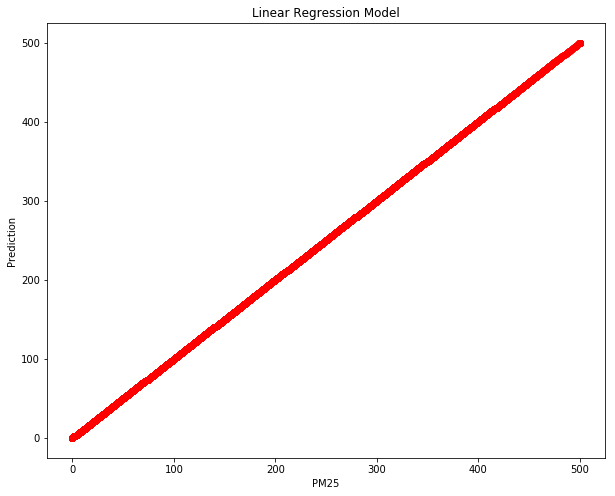

In [15]:
lr_PM25Arr = np.array(lr_test_results.predictions.select('PM25').collect())
lr_PredictionArr = np.array(lr_test_results.predictions.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(lr_PM25Arr,lr_PredictionArr, alpha=.75,color='r') 
 
plt.xlabel('PM25')
plt.ylabel('Prediction')
plt.title('Linear Regression Model')

plt.show()

In [11]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

rf = RandomForestRegressor(labelCol="PM25", featuresCol="patterns", predictionCol = "prediction")

rf_pipeline = Pipeline(stages=[assembler, rf])
rf_model = rf_pipeline.fit(train_data)

In [12]:
rf_train_results = rf_model.transform(train_data)

rf_train_results.select('PM25','prediction').show(10)

rf_evaluator = RegressionEvaluator(labelCol = "PM25")
print("Mean Absolute Error on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mae"}))
print("Mean Squared Error on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mse"}))
print("Root Mean Squared Error on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "rmse"}))


+-----+------------------+
| PM25|        prediction|
+-----+------------------+
|346.0|322.48932407990014|
|340.0| 307.4792924007187|
| 25.0|36.842330170956856|
|  0.0| 46.51485710694004|
|345.0|352.25478076025007|
|271.0| 235.6352871605467|
|288.0|298.74624707666743|
| 59.0| 76.79804490300567|
|304.0| 300.1344931678699|
|240.0| 264.3721855764892|
+-----+------------------+
only showing top 10 rows

Mean Absolute Error on train data = 13.3092
Mean Squared Error on train data = 415.933
Root Mean Squared Error on train data = 20.3944


In [13]:
rf_test_results = rf_model.transform(test_data)
rf_test_results.select('PM25','prediction').show(10)
rf_evaluator = RegressionEvaluator(labelCol = "PM25")

print("Mean Absolute Error on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mae"}))
print("Mean Squared Error on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mse"}))
print("Root Mean Squared Error on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "rmse"}))


+-----+------------------+
| PM25|        prediction|
+-----+------------------+
| 53.0| 51.95942774354953|
|358.0|339.88631277317813|
|188.0| 190.4607838893548|
|170.0|159.92641397161393|
|235.0|204.31957971543824|
| 59.0| 57.93037781495635|
|124.0| 126.3445822551754|
|  0.0|29.563329049523627|
|353.0|338.75844354565965|
| 19.0| 35.20669193322654|
+-----+------------------+
only showing top 10 rows

Mean Absolute Error on test data = 13.4105
Mean Squared Error on test data = 417.744
Root Mean Squared Error on test data = 20.4388


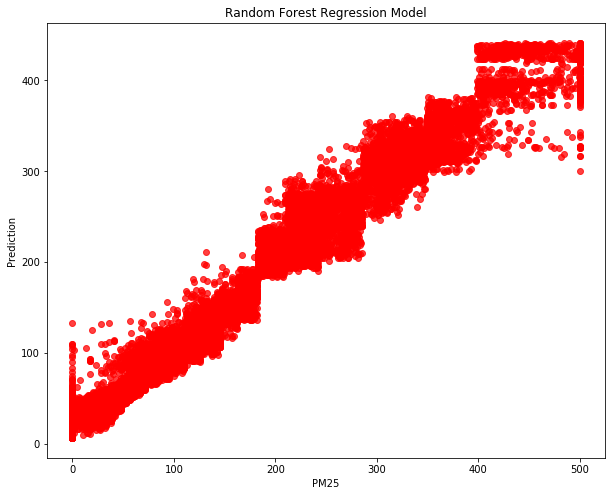

In [14]:
rf_PriceArr = np.array(rf_test_results.select('PM25').collect())
rf_PredictionArr = np.array(rf_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_PriceArr,rf_PredictionArr, alpha=.75, color='r') 
plt.xlabel('PM25')
plt.ylabel('Prediction')
plt.title('Random Forest Regression Model')

plt.show()

In [7]:
from pyspark.ml.feature import StandardScaler

assembler1 = VectorAssembler(
    inputCols=['PM25','PM10','NO2', 'NH3'],
    outputCol="patterns1")
air_pollution_f = assembler1.transform(df_new)

train_data1, test_data1 = air_pollution_f.randomSplit([0.7, 0.3], seed=123)


scaler = StandardScaler(inputCol="patterns1", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(train_data1)

train_data1 = scalerModel.transform(train_data1)
test_data1 = scalerModel.transform(test_data1)

train_data1.show(5)      
test_data1.show(5)

+--------------------+---------+--------------------+-------------+-------------+-----+----------+----------+-----+-----+-----+----+-----+----+-----+--------------------+--------------------+
|            datetime|       id|                name|       cityid|      stateid| live| longitude|  latitude| PM25| PM10|  NO2| NH3|  SO2|  CO|OZONE|           patterns1|            features|
+--------------------+---------+--------------------+-------------+-------------+-----+----------+----------+-----+-----+-----+----+-----+----+-----+--------------------+--------------------+
|Friday, 01 Feb 20...| site_114|IHBAS, Dilshad Ga...|        Delhi|        Delhi| true|77.3025234|28.6811736|346.0|  0.0| 91.0| 9.0| 33.0|47.0|  0.0|[346.0,0.0,91.0,9.0]|[1.83073965589465...|
|Friday, 01 Feb 20...|site_1550|New Mandi, Muzaff...|Muzaffarnagar|Uttar Pradesh| true|77.7194031|29.4723508|340.0|210.0| 98.0|18.0| 34.0|69.0| 34.0|[340.0,210.0,98.0...|[1.78124174124090...|
|Friday, 01 Feb 20...| site_253|Punjab A

In [9]:
from pyspark.ml.clustering import KMeans

K = 5
kmeans = KMeans(k=K, seed=123)
model = kmeans.fit(train_data1)

In [10]:
train_wssse = model.computeCost(train_data1)
test_wssse = model.computeCost(test_data1)

print("Train Within Set Sum of Squared Errors = {}".format(train_wssse))
print("Test Within Set Sum of Squared Errors = {}".format(test_wssse))


Train Within Set Sum of Squared Errors = 128061.03745499653
Test Within Set Sum of Squared Errors = 54563.49745868199


In [11]:
train_preds_data1 = model.transform(train_data1)
test_preds_data1 = model.transform(test_data1)

test_preds_data1.show(5)


+--------------------+---------+--------------------+------------+---------+----+----------+----------+-----+-----+-----+----+----+----+-----+--------------------+--------------------+----------+
|            datetime|       id|                name|      cityid|  stateid|live| longitude|  latitude| PM25| PM10|  NO2| NH3| SO2|  CO|OZONE|           patterns1|            features|prediction|
+--------------------+---------+--------------------+------------+---------+----+----------+----------+-----+-----+-----+----+----+----+-----+--------------------+--------------------+----------+
|Friday, 01 Feb 20...|site_1393|Adarsh Nagar, Jai...|      Jaipur|Rajasthan|true| 75.836858| 26.902909| 53.0| 54.0| 11.0| 4.0| 7.0|38.0| 54.0|[53.0,54.0,11.0,4.0]|[-0.5864085096968...|         0|
|Friday, 01 Feb 20...|site_1424|Jawaharlal Nehru ...|       Delhi|    Delhi|true| 77.233829|  28.58028|358.0|260.0|138.0|15.0|22.0|82.0|  1.0|[358.0,260.0,138....|[1.92973548520216...|         1|
|Friday, 01 Feb 20..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51e0e3dcf8>]],
      dtype=object)

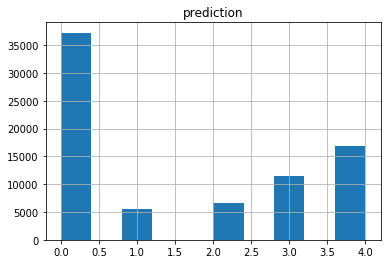

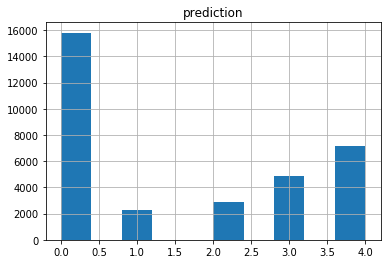

In [15]:
train_preds_data1.select("prediction").toPandas().hist()
test_preds_data1.select("prediction").toPandas().hist()

With K=2
Training set Within Set Sum of Squared Errors = 201896.2262286766
Test set Within Set Sum of Squared Errors = 85777.87037933366
With K=3
Training set Within Set Sum of Squared Errors = 170035.73297488817
Test set Within Set Sum of Squared Errors = 72514.31014818665
With K=4
Training set Within Set Sum of Squared Errors = 142431.061723499
Test set Within Set Sum of Squared Errors = 60735.86336351275
With K=5
Training set Within Set Sum of Squared Errors = 128061.03745499653
Test set Within Set Sum of Squared Errors = 54563.49745868199
With K=6
Training set Within Set Sum of Squared Errors = 114205.70614782539
Test set Within Set Sum of Squared Errors = 48912.85848093843
With K=7
Training set Within Set Sum of Squared Errors = 101693.76734956176
Test set Within Set Sum of Squared Errors = 43566.5982102232
With K=8
Training set Within Set Sum of Squared Errors = 96735.6855983586
Test set Within Set Sum of Squared Errors = 41403.13400644764
With K=9
Training set Within Set Sum of 

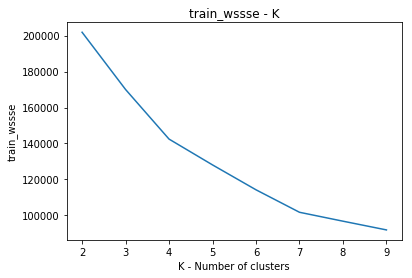

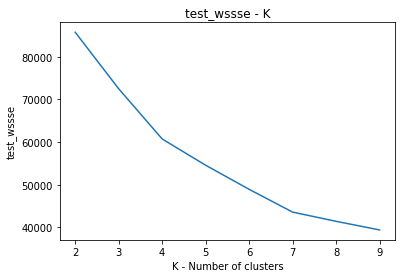

In [13]:
tr_wcss = []
te_wcss = []
for K in range(2,10):
    kmeans = KMeans(k=K, seed=123)
    model = kmeans.fit(train_data1)
    train_wssse = model.computeCost(train_data1)
    test_wssse = model.computeCost(test_data1)
    tr_wcss.append(train_wssse)
    te_wcss.append(test_wssse)
    print("With K={}".format(K))
    print("Training set Within Set Sum of Squared Errors = {}" .format(train_wssse))
    print("Test set Within Set Sum of Squared Errors = {}" .format(test_wssse))

plt.plot(range(2,10), tr_wcss)
plt.title('train_wssse - K')
plt.xlabel('K - Number of clusters')
plt.ylabel('train_wssse')   
plt.show()

plt.plot(range(2,10), te_wcss)
plt.title('test_wssse - K')
plt.xlabel('K - Number of clusters')
plt.ylabel('test_wssse')   
plt.show()
